# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
!pip install pandas==0.23

    100% |████████████████████████████████| 11.7MB 4.3MB/s eta 0:00:01
pyspark 2.2.1 requires py4j==0.10.4, which is not installed.
  Found existing installation: pandas 0.20.3
    Uninstalling pandas-0.20.3:
      Successfully uninstalled pandas-0.20.3
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [102]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [103]:
pd.__version__

'0.20.3'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [104]:
movies = pd.read_csv('titles.csv.bz2', compression='bz2')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
title    244914 non-null object
year     244914 non-null int64
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [105]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [106]:
cast = pd.read_csv('cast.csv.bz2', compression='bz2')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
title        object
year         int64
name         object
type         object
character    object
n            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [107]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [108]:
release_dates = pd.read_csv('release_dates.csv.bz2', compression='bz2', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
title      479488 non-null object
year       479488 non-null int64
country    479488 non-null object
date       479488 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [109]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [110]:
len(movies)

244914

### List all Batman movies ever made

In [111]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [112]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [113]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [114]:
harry_df=movies[movies.title.str.contains('Harry Potter', case=False)]
harry_df.sort_values(by=['year'], ascending=False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [115]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [116]:
len(movies[movies.year==2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [117]:
len(movies[(movies.year >2008) & (movies.year <2018)]) #movies.year >2008

72702

### Section I - Q4: How many movies are titled "Hamlet"?

In [118]:
len(movies[movies.title=='Hamlet'])

20

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [119]:
hamlet=movies[(movies.title=='Hamlet')&(movies.year>=2000)]
hamlet.sort_values(by=['year'], ascending=False)

,title,year
244747,Hamlet,2017
191940,Hamlet,2016
186137,Hamlet,2015
178290,Hamlet,2014
227953,Hamlet,2011
1931,Hamlet,2009
55639,Hamlet,2000


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [120]:
#print(cast)
inception=cast[(cast.title=='Inception')]
print(inception.n.isnull().sum())

27


### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [121]:
print(inception.n.notnull().sum())
# OR
#print(len(inception.n)-inception.n.isnull().sum())

51


### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- support cast always have an 'n' value
- remember to sort!

In [122]:
inception.sort_values(by='n', ascending=True).iloc[:10]

,title,year,name,type,character,n
590576,Inception,2010,Leonardo DiCaprio,actor,Cobb,1.0
859993,Inception,2010,Joseph Gordon-Levitt,actor,Arthur,2.0
3387147,Inception,2010,Ellen Page,actress,Ariadne,3.0
940923,Inception,2010,Tom Hardy,actor,Eames,4.0
2406531,Inception,2010,Ken Watanabe,actor,Saito,5.0
1876301,Inception,2010,Dileep Rao,actor,Yusuf,6.0
1615709,Inception,2010,Cillian Murphy,actor,Robert Fischer,7.0
183937,Inception,2010,Tom Berenger,actor,Browning,8.0
2765969,Inception,2010,Marion Cotillard,actress,Mal,9.0
1826027,Inception,2010,Pete Postlethwaite,actor,Maurice Fischer,10.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [123]:
#cast.head()
mov_albus=cast[(cast.character =='Albus Dumbledore')&(cast.type=='actor')]
mov_albus.drop_duplicates(subset ="name", inplace = True)
print(mov_albus)
print('\n\n')
print(mov_albus.name)

                                           title  year                 name  \
704984                                Epic Movie  2007         Dane Farwell   
792421       Harry Potter and the Goblet of Fire  2005       Michael Gambon   
947789   Harry Potter and the Chamber of Secrets  2002       Richard Harris   
1685537                    Ultimate Hero Project  2013  George (X) O'Connor   
2248085                                   Potter  2015    Timothy Tedmanson   

          type         character     n  
704984   actor  Albus Dumbledore  17.0  
792421   actor  Albus Dumbledore  37.0  
947789   actor  Albus Dumbledore  32.0  
1685537  actor  Albus Dumbledore   NaN  
2248085  actor  Albus Dumbledore   NaN  



704984            Dane Farwell
792421          Michael Gambon
947789          Richard Harris
1685537    George (X) O'Connor
2248085      Timothy Tedmanson
Name: name, dtype: object


/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [124]:
print(cast.head())
keanu=cast[(cast.name=='Keanu Reeves')&(cast.year>=1999) & (cast.n.notnull())]

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4  31.0
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


In [125]:
keanu.sort_values(by='year',ascending=True, inplace=True)
print(keanu)

                                  title  year          name   type  \
1892370                     Me and Will  1999  Keanu Reeves  actor   
1892369                     Me and Will  1999  Keanu Reeves  actor   
1892390                      The Matrix  1999  Keanu Reeves  actor   
1892398                     The Watcher  2000  Keanu Reeves  actor   
1892397                The Replacements  2000  Keanu Reeves  actor   
1892387                        The Gift  2000  Keanu Reeves  actor   
1892383                  Sweet November  2001  Keanu Reeves  actor   
1892358                       Hard Ball  2001  Keanu Reeves  actor   
1892379          Something's Gotta Give  2003  Keanu Reeves  actor   
1892391             The Matrix Reloaded  2003  Keanu Reeves  actor   
1892392          The Matrix Revolutions  2003  Keanu Reeves  actor   
1892351                    Ellie Parker  2005  Keanu Reeves  actor   
1892348                     Constantine  2005  Keanu Reeves  actor   
1892400             

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [126]:
#cast.head()
rol50_60=cast[(cast.year>=1950)&(cast.year<=1960)&(cast.type.str.contains('act'))]
#rol50_60
len(rol50_60)

234635

In [127]:
rol07_17=cast[(cast.year>=2007)&(cast.year<=2017)&(cast.type.str.contains('act'))]
len(rol07_17)

1452413

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [128]:
#same as above

In [129]:
#same as above

In [130]:
#same as above

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [131]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
Maya                    12
Temptation              12
The Outsider            12
The Three Musketeers    11
Freedom                 11
Othello                 11
Honeymoon               11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

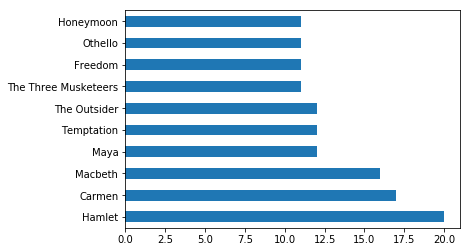

In [132]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [133]:
#movies.head()
top3=movies.year.value_counts()[:3]
top3

2017    11474
2016     9440
2015     8702
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [134]:
movies_per_decade=movies
movies_per_decade['decade']=movies_per_decade.year-(movies.year%10)
movies_per_decade.head()

,title,year,decade
0,The Ticket to the Life,2009,2000
1,Parallel Worlds: A New Rock Music Experience,2016,2010
2,Morita - La hija de Jesus,2008,2000
3,Gun,2017,2010
4,Love or Nothing at All,2014,2010


In [135]:
sort_movie=movies_per_decade.sort_values(by='decade', ascending=True)
sort_movie

,title,year,decade
51257,Reproduction of the Corbett and Jeffries Fight,1899,1890
156170,Miss Jerry,1894,1890
41687,The Startled Lover,1898,1890
158077,The Life of Moses,1909,1900
221004,Robbery Under Arms,1907,1900
225239,El pastorcito de Torrente,1908,1900
198569,Don Quijote,1908,1900
85039,Andreas Hofer,1909,1900
180502,Gans-Nelson Fight,1908,1900
48016,Amleto,1908,1900


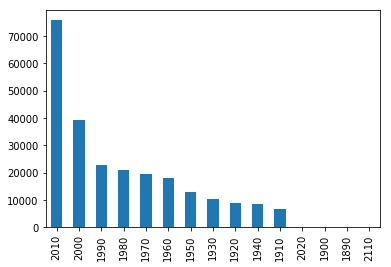

In [136]:
sort_movie.decade.value_counts().plot(kind='bar')

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [137]:
cast.character.value_counts()[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [138]:
cast[cast.character=='Herself'].name.value_counts()[:10]

Queen Elizabeth II           12
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Joyce Brothers                9
Margaret Thatcher             8
Hillary Clinton               8
Oprah Winfrey                 6
Mar?a Isabel (III) Mart?n     6
Joan Rivers                   6
Marta Berrocal                6
Name: name, dtype: int64

In [139]:
cast[cast.character=='Himself'].name.value_counts()[:10]

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Ron Jeremy               22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [140]:
cast[cast.character.str.startswith('Zombie')].character.sort_values(ascending=False)[:10]

3147629                   Zombies' Hands
3769506                   Zombies' Hands
1665264                   Zombies' Hands
1499220    Zombies in a Shed" - Segment)
1499223    Zombies in a Shed" - Segment)
1049607           Zombies and Insurgents
133209            Zombies and Insurgents
1022752           Zombies and Insurgents
2387124           Zombies and Insurgents
1764871           Zombies and Insurgents
Name: character, dtype: object

In [141]:
cast[cast.character.str.startswith('Police')].character.sort_values(ascending=False)[:10]

2615918                 Policewomen
3712012                 Policewomen
1095370      Policewoman's neighbor
3634714      Policewoman's neighbor
3626708         Policewoman's Voice
2724009          Policewoman's Girl
3064028    Policewoman with Glasses
2801606          Policewoman square
3778265      Policewoman restaurant
3383532         Policewoman on Roof
Name: character, dtype: object

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

In [142]:
knu=cast[cast.name=='Keanu Reeves'].sort_values(by='year')
knu
#knu.year.value_counts().plot(kind='bar')
#value_counts(ascending=False).plot(kind='bar')

,title,year,name,type,character,n
1892373,One Step Away,1985,Keanu Reeves,actor,Ron Petrie,1.0
1892403,Youngblood,1986,Keanu Reeves,actor,Heaver,12.0
1892377,River's Edge,1986,Keanu Reeves,actor,Matt,2.0
1892355,Flying,1986,Keanu Reeves,actor,Tommy Warneki,3.0
1892395,The Prince of Pennsylvania,1988,Keanu Reeves,actor,Rupert Marshetta,2.0
1892394,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0
1892375,Permanent Record,1988,Keanu Reeves,actor,Chris Townsend,6.0
1892349,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0
1892346,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0
1892374,Parenthood,1989,Keanu Reeves,actor,Tod,8.0


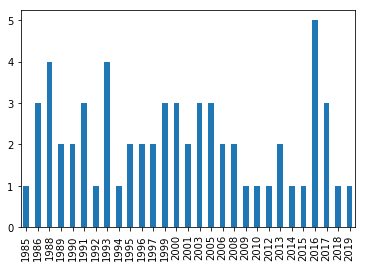

In [143]:
knu.year.value_counts(sort=False).plot(kind='bar') # by default value_count sorts the values in desceding order.. in that way year plot would go haywire.
# this can be checked by removing sort argument from value_counts()

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


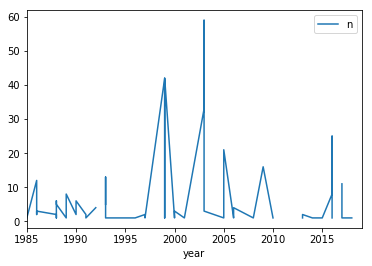

In [144]:
knu.plot(x='year',y='n')

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


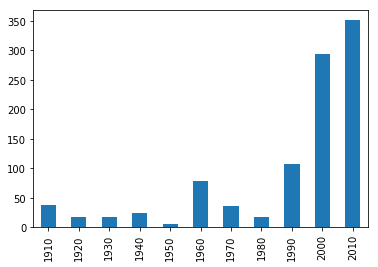

In [145]:
#cast.head()
hamlet=cast[cast.title.str.contains('Hamlet')]
hamlet['decade']=hamlet.year-(hamlet.year%10)
hamlet.decade.value_counts(sort=False).plot(kind='bar')

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

In [153]:
#cast.head()
cast[(cast.type.str.startswith('act'))&(cast.n>0)&(cast.year>=1960)&(cast.year<1970)].type.value_counts()

actor      89431
actress    41885
Name: type, dtype: int64

In [154]:
#same as above only change in year

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [187]:
#cast.head()
frank_oz=cast[cast.name.str.contains('Frank Oz')]
frank_oz=frank_oz[frank_oz.duplicated(subset=['title','year'])]
frank_oz_clean=frank_oz.drop_duplicates(subset=['title','year'])
frank_oz_clean.sort_values(by='year')

,title,year,name,type,character,n
1723646,The Muppet Movie,1979,Frank Oz,actor,Fozzie Bear,2.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
1723633,The Great Muppet Caper,1981,Frank Oz,actor,Fozzie Bear,2.0
1723630,The Dark Crystal,1982,Frank Oz,actor,Chamberlain (performer),3.0
1723654,The Muppets Take Manhattan,1984,Frank Oz,actor,Fozzie,2.0
1723602,Follow That Bird,1985,Frank Oz,actor,Bert,3.0
1723639,The Muppet Christmas Carol,1992,Frank Oz,actor,Fozzie Bear as Fozziewig,5.0
1723609,Muppet Treasure Island,1996,Frank Oz,actor,Fozzie Bear,14.0
1723613,Muppets from Space,1999,Frank Oz,actor,Fozzie Bear,7.0
1723626,The Adventures of Elmo in Grouchland,1999,Frank Oz,actor,Grover,16.0


### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [190]:
frank_oz_r=cast[cast.name.str.contains('Frank Oz')]
frank_oz_r=frank_oz_r[frank_oz_r.duplicated(subset=['character'])]
frank_oz_clean_r=frank_oz.drop_duplicates(subset=['character'])
frank_oz_clean_r.sort_values(by='year')

,title,year,name,type,character,n
1723652,The Muppet Movie,1979,Frank Oz,actor,Motorcycle Guy,2.0
1723651,The Muppet Movie,1979,Frank Oz,actor,Swedish Chef (assistant),2.0
1723650,The Muppet Movie,1979,Frank Oz,actor,Marvin Suggs,2.0
1723649,The Muppet Movie,1979,Frank Oz,actor,Doc Hopper's Men,2.0
1723599,An American Werewolf in London,1981,Frank Oz,actor,Miss Piggy,13.0
1723637,The Great Muppet Caper,1981,Frank Oz,actor,Swedish Chef,2.0
1723636,The Great Muppet Caper,1981,Frank Oz,actor,Gramps,2.0
1723630,The Dark Crystal,1982,Frank Oz,actor,Chamberlain (performer),3.0
1723654,The Muppets Take Manhattan,1984,Frank Oz,actor,Fozzie,2.0
1723658,The Muppets Take Manhattan,1984,Frank Oz,actor,Ocean Breeze Soap Board Member,2.0


# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

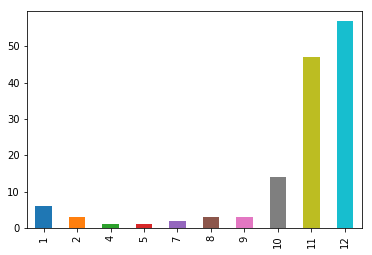

In [17]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

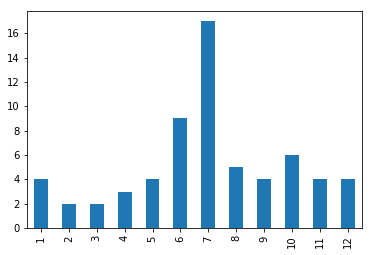

In [194]:
summer=release_dates[release_dates.title.str.contains('Summer')&(release_dates.country=='USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

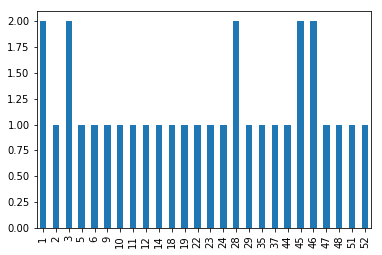

In [195]:
action=release_dates[release_dates.title.str.contains('Action')&(release_dates.country=='USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [222]:
#print(release_dates.head())
#print(cast.head())
cast_kn=cast[(cast.name=='Keanu Reeves') & (cast.n>0)] 
release_kn=release_dates[release_dates.country=='USA']
merged_df=cast_kn.merge(release_kn, how='inner',on=['title','year'])
merged_df.sort_values('date')
#print(release_kn.head())

,title,year,name,type,character,n,country,date
44,Youngblood,1986,Keanu Reeves,actor,Heaver,12.0,USA,1986-01-31
24,River's Edge,1986,Keanu Reeves,actor,Matt,2.0,USA,1987-05-08
39,The Night Before,1988,Keanu Reeves,actor,Winston Connelly,1.0,USA,1988-04-15
22,Permanent Record,1988,Keanu Reeves,actor,Chris Townsend,6.0,USA,1988-04-22
4,Bill & Ted's Excellent Adventure,1989,Keanu Reeves,actor,Ted,1.0,USA,1989-02-17
7,Dangerous Liaisons,1988,Keanu Reeves,actor,Chevalier Danceny,5.0,USA,1989-02-24
21,Parenthood,1989,Keanu Reeves,actor,Tod,8.0,USA,1989-05-26
13,I Love You to Death,1990,Keanu Reeves,actor,Marlon,6.0,USA,1990-04-06
43,Tune in Tomorrow...,1990,Keanu Reeves,actor,Martin Loader,2.0,USA,1990-11-02
23,Point Break,1991,Keanu Reeves,actor,Johnny Utah,2.0,USA,1991-07-12


### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

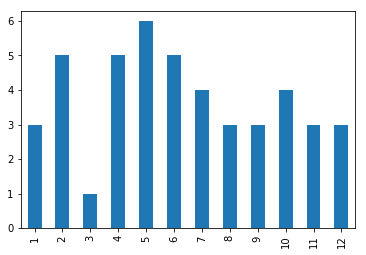

In [224]:
merged_df.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [ ]:
#same as above for Ian Mckellen